<a href="https://colab.research.google.com/github/amirsbg1997/digital-twin-renewable-infrastructure/blob/main/notebooks/digital_twin_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [ ]:
# Create sample energy data directly (mock live data)
data = pd.DataFrame({
    "time": [1, 2, 3, 4, 5],
    "solar_generation": [50, 48, 30, 25, 40],
    "demand": [45, 46, 50, 52, 48]
})

data


,time,solar_generation,demand
0,1,50,45
1,2,48,46
2,3,30,50
3,4,25,52
4,5,40,48


In [ ]:
# Define system components
data["storage"] = 0.0
storage_capacity = 30
storage_level = 10

for i in range(len(data)):
    generation = data.loc[i, "solar_generation"]
    demand = data.loc[i, "demand"]
    mismatch = generation - demand

    if mismatch > 0:
        charge = min(mismatch, storage_capacity - storage_level)
        storage_level += charge
    else:
        discharge = min(abs(mismatch), storage_level)
        storage_level -= discharge

    data.loc[i, "storage"] = storage_level

data


,time,solar_generation,demand,storage
0,1,50,45,15.0
1,2,48,46,17.0
2,3,30,50,0.0
3,4,25,52,0.0
4,5,40,48,0.0


In [ ]:
# Simple resilience indicators
data["supply_gap"] = data["demand"] - data["solar_generation"]
data["supply_gap"] = data["supply_gap"].apply(lambda x: x if x > 0 else 0)

total_gap = data["supply_gap"].sum()
max_gap = data["supply_gap"].max()

total_gap, max_gap


(np.int64(55), 27)

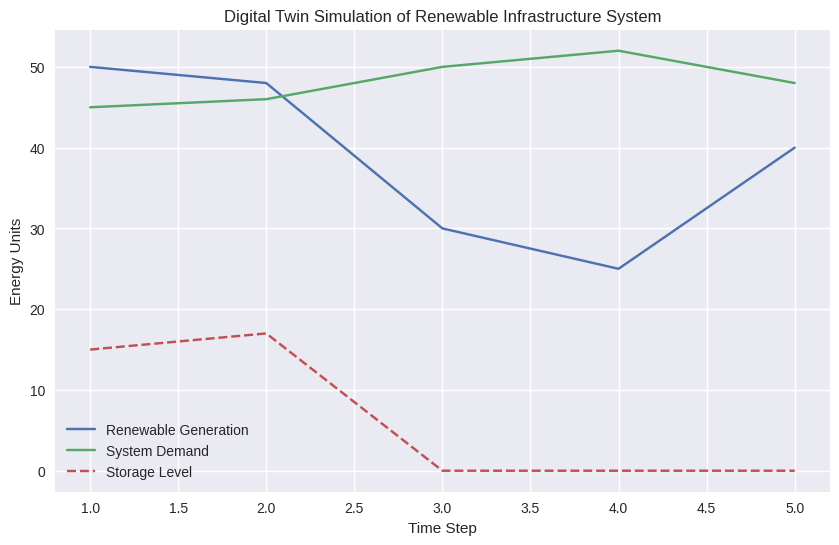

In [ ]:
import os
os.makedirs("../outputs", exist_ok=True)

plt.figure(figsize=(10,6))

plt.plot(data["time"], data["solar_generation"], label="Renewable Generation")
plt.plot(data["time"], data["demand"], label="System Demand")
plt.plot(data["time"], data["storage"], label="Storage Level", linestyle="--")

plt.xlabel("Time Step")
plt.ylabel("Energy Units")
plt.title("Digital Twin Simulation of Renewable Infrastructure System")
plt.legend()
plt.grid(True)

plt.savefig("../outputs/example_results.png", dpi=300)
plt.show()


In [ ]:
print("Total unmet demand (supply gap):", total_gap)
print("Maximum single-period gap:", max_gap)

if total_gap == 0:
    print("System remains resilient under simulated conditions.")
else:
    print("System experiences stress under renewable variability.")


Total unmet demand (supply gap): 55
Maximum single-period gap: 27
System experiences stress under renewable variability.
